GUEDIRA Oussama - GAUDRON Baptiste

### EXAMEN 2020 : Cet examen est composé de deux exercices. Les réponses seront données dans un notebook et l'examen sera fait soit seul soit en binome. 

In [18]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Exercice 1

Nous souhaitons maintenant evaluer si un nouveau traitement a un effet significatif  
 sur l'efficacite d'un moteur en fonction de son age.  

## QUESTION 1.1 

Lisez le fichier Observations_2.csv qui contient les donnees, traitez les et
representez les avec :
- 'Age' en abscisse
- 'Efficiency' en ordonnee
- Les observations avec le traitement standard (Standard) en bleu
- Les observations avec le nouveau traitement (Tested) en rouge.
A la vue du graphe, vous semble-t-il y avoir un effet ?

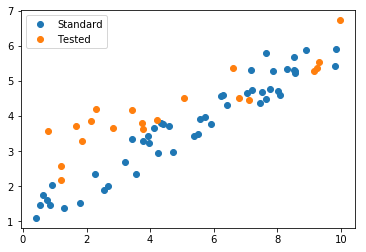

In [2]:
dataframe=pandas.read_csv("./Observations_2.csv",sep=' ')

groups = dataframe.groupby("Treatment")
for name, group in groups:
     plt.plot(group["Age"], group["Efficiency"], marker="o", linestyle="", label=name)
plt.legend()

Un nouveau traitement semble avoir un effet signifaitf pour les moteurs "jeunes" avec un age inférieur à 6 ans. En effet, leur efficacité est meilleur que pour un traitement standard

## QUESTION 1.2 

On supposera qu'il existe une relation lineaire entre l'age du moteur et son niveau d'efficacite a un bruit Gaussien pres. 
- Utilisez un modele de type regression lineaire pour mettre en lien les données. 
- Utilisez ensuite un test statistique pour evaluer si l'impact du traitement est significatif.

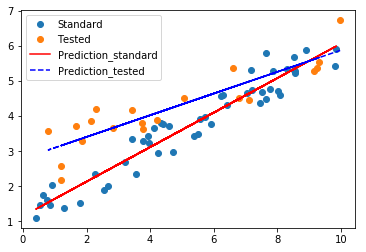

In [3]:
df_standard =  dataframe.query('Treatment =="Standard"')
n = df_standard.shape[0]
X_standard = df_standard["Age"].to_numpy().reshape(n,1)
y_standard = df_standard.Efficiency.to_numpy()

reg = LinearRegression().fit(X_standard, y_standard)
reg.score(X_standard,y_standard)
y_pred_standard = reg.predict(X_standard)

df_tested =  dataframe.query('Treatment =="Tested"')
n = df_tested.shape[0]
X_tested = df_tested["Age"].to_numpy().reshape(n,1)
y_tested = df_tested.Efficiency.to_numpy()

reg_2 = LinearRegression().fit(X_tested, y_tested)
reg_2.score(X_tested,y_tested)
y_pred_tested = reg_2.predict(X_tested)

groups = dataframe.groupby("Treatment")
for name, group in groups:
     plt.plot(group["Age"], group["Efficiency"], marker="o", linestyle="", label=name)
plt.plot(X_standard,y_pred_standard,'r-',label = 'Prediction_standard')
plt.plot(X_tested,y_pred_tested,'b--',label = 'Prediction_tested')
plt.legend()

On peut voir que les deux traitements ont l'air d'avoir un impact différent sur l'efficacité (avec le traitement Testé plus efficace que le Standard).




On utilise l'analyse de covariance pour le test car on est en présence une variable quantitative Y ("Efficiency") expliquee par une variable qualitative T ("Treatment") à 2 niveaux et une variable quantitative (covariable) X qui est l'âge.

On utlise la fonction ANCOVA disponible dans la librairie `pingouin`.

In [4]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pingouin import ancova
ancova(data = dataframe,dv = 'Efficiency',covar='Age', between = 'Treatment')

/usr/local/anaconda3.7/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/usr/local/anaconda3.7/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


,Source,SS,DF,F,p-unc,np2
0,Treatment,8.063162,1,36.249246,8.164141e-08,0.351085
1,Age,102.353010,1,460.144466,1.010999e-31,0.872900
2,Residual,14.903258,67,NaN,NaN,NaN


On observe une p-value de $8.16e^{-8}$ largement inférieur à 0.05 donc on peut rejeter l'hypothèse nulle que les traitements sont équivalents.

## Exercice 2 

Nous souhaitons développer une méthode de type apprentissage automatique
qui quantifie en temps reel le risque de collision d'un drone avec des objets environnants.

Pour y arriver, nous avons embarqué 18 capteurs sur un drone en phase de test. Un expert
a alors quantifié à plusieurs instants son risque de collision avec un autre objet.  
Un total de 67 observations labellisées ont été enregistrées dans le fichier 
'Observations_1.csv'.

Nous allons évaluer dans cet exercice si ces observations nous permettent de mettre en
lien les données capteurs avec le niveau de risque. Nous allons aussi évaluer si nous 
aurions une bonne performance avec un sous ensemble pertinent des capteurs. Chaque
capteur a en effet un poids non négligeable et à besoin d'énergie pour fonctionner, ce qui
a un impact sur le temps d'utilisation du drone entre deux rechargements de ses batteries.

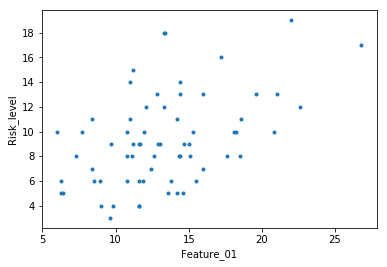

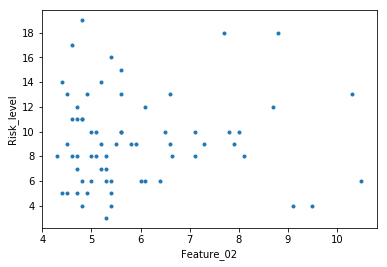

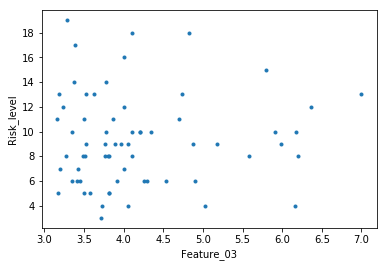

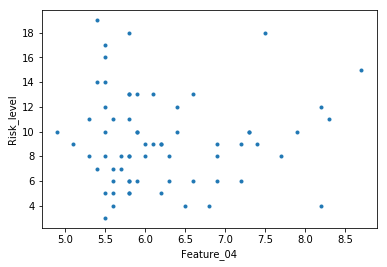

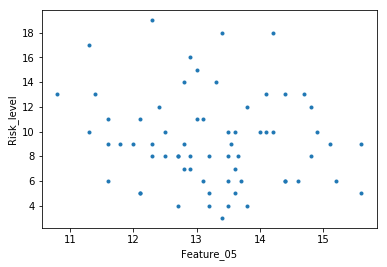

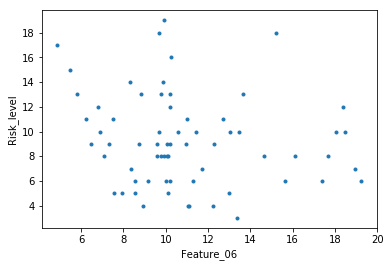

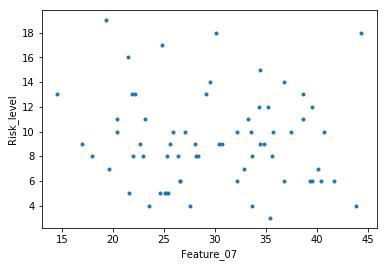

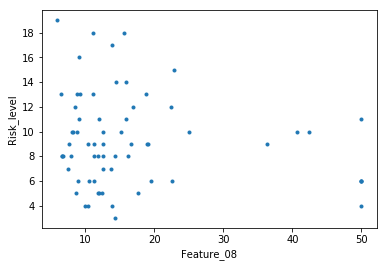

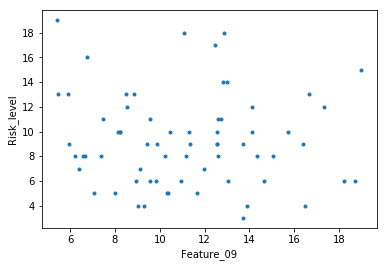

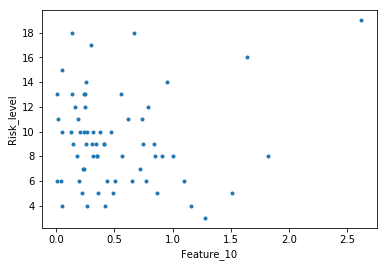

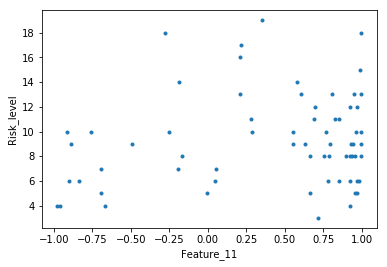

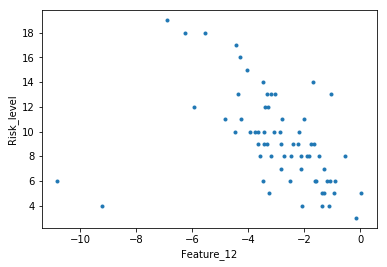

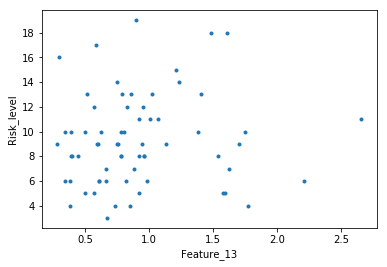

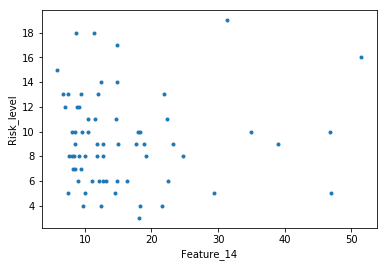

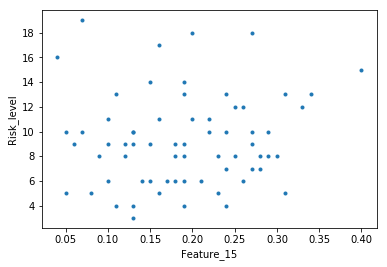

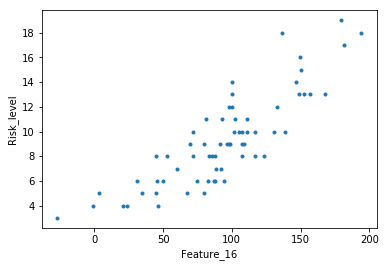

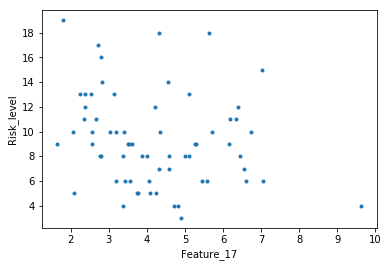

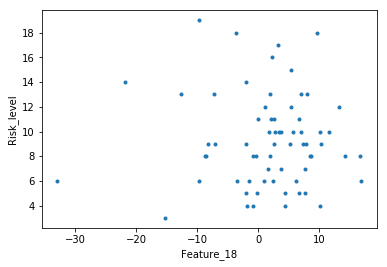

In [6]:
dataframe=pandas.read_csv("./Observations_1.csv",sep=';')

listColNames=list(dataframe.columns)


XY=dataframe.values
ColNb_Y=listColNames.index('Risk_level')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only


for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Risk_level')
  plt.show()


## QUESTION 2.1

Observez les donnees unes par unes. Est-ce que vous identifiez visuellement des liens entre 
certaines variables et la variable 'Risk_level'. Si oui, lesquels?

### Réponse

La feature_16 semble avoir un lien linéaire avec le risk_level. Une relation entre le risk_level et les 
features 1 et 12 sont aussi envisageables.


# QUESTION 2.2

On se demande si il est possible de predire le niveau de 'Risk_level' à partir d'une
seule des variables 'Feature_01', 'Feature_07' ou 'Feature_16'. 

## QUESTION 2.2.1 

Effectuez une regression lineaire simple entre 'Risk_level' et chacune de ces variables.  
Toutes les donnees seront utilisees. 

Evaluez alors la qualité des predictions sur toutes les donnees à l'aide de la moyenne de l'erreur de prediction au carre (MSE).

Quel est le risque potentiel en utilisant cette stratégie de validation de l'apprentissage ? 

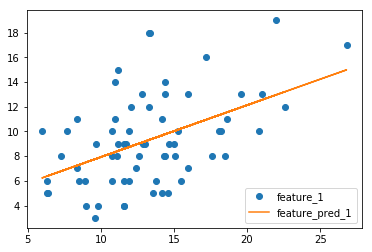

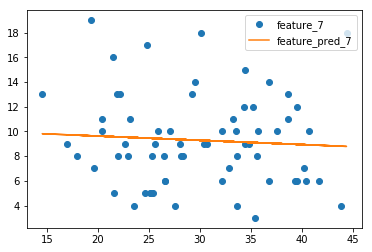

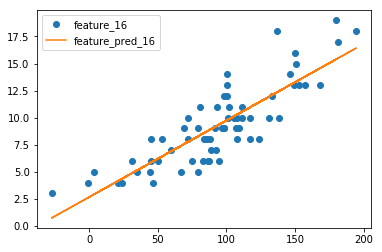

MSE pour 1: 10.480923895867484 
 pour 7 : 13.506926344682194 
 pour 16 :3.8333467105730303
R coefficient pour 1 : 0.22756273597159693
 pour 7 : 0.004548326580904538 
 pour 16 :0.717484844408153


In [7]:
features_1_7_16 = [1,7,16]

MSE = []
MST = np.mean((Y-np.mean(Y))**2)
for i in (features_1_7_16):
    X_feature = (X[:,i-1]).reshape(66,1)
    y = Y[:]
    model = LinearRegression().fit(X_feature,y)
    y_pred = model.predict(X_feature)
    erreurs=(y-y_pred)
    MSE.append(np.mean(erreurs*erreurs))
    plt.plot(X_feature,y,marker = 'o', linestyle="",label = "feature_" + str(i))
    plt.plot(X_feature,y_pred,linestyle="-", label =  "feature_pred_" + str(i))
    plt.legend()
    plt.show()
    
print(f'MSE pour 1: {MSE[0]} \n pour 7 : {MSE[1]} \n pour 16 :{MSE[2]}')
print(f'R coefficient pour 1 : {1-MSE[0]/MST}\n pour 7 : {1-MSE[1]/MST} \n pour 16 :{1-MSE[2]/MST}')

D'après les MSE des différents features 1, 7 et 16, on peut voir que le modèle linéaire est plutôt bon pour le feature 16 moyennement bon pour le feature 1 mais pas du adapté pour le feature 7.

De plus, cette méthode désavantage enormément les distributions où nous avons des outliers, ce qui fait qu'elle n'est pas toujours la plus adaptée.

    

## QUESTION 2.2.2

Evaluez a quel point les predictions sont stables à l'aide d'une méthode de validation croisée de type 4-folds.


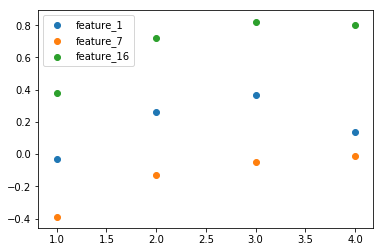

In [8]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=4)
scores = []
for i in (features_1_7_16):
    X_feature = (X[:,i-1]).reshape(66,1)
    y = Y[:]
    scores_feature = []
    for train_index, test_index in kf.split(X_feature):
        X_train, X_test = X_feature[train_index], X_feature[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LinearRegression().fit(X_train,y_train)
        scores_feature.append(model.score(X_test,y_test))
    scores.append(scores_feature)
        
        
scores=np.array([np.array(xi) for xi in scores])

for i in range(3):
    x = np.arange(1,5,1)
    plt.scatter(x,scores[i,:],label = 'feature_' + str(features_1_7_16[i]))
    plt.legend()

Les prédictions n'ont pas l'air stable d'après les scores de régression linéaire puisqu'on peut voir que le $R²$ peut varier de 0.4 entre les différents folds.
Il faudrait plus de données pour améliorer la stabilité.

## QUESTION 2.2.3
Peut-on enfin dire si on observe une relation significative entre 'Risk_level' et (independament) 'Feature_01', 'Feature_07' ou bien 'Feature_16'. On peut le valider à l'aide d'un test d'hypothese dont on decrira la procedure.

### Réponse

Ainsi, d'après les calculs précédents on peut dire que l'on observe une relation significative entre 'Risk Level' et les features 1 et 16 mais pas pour le feature 7.

On peut valider ceci en réalisant un test statistique avec pour hypothèse la nullité de la pente de régression en utilisant l’hypothèse de Gaussianité des residus ce que l'on peut faire avec le module stats de scipy.

In [9]:
p_values=[]
for i in (features_1_7_16):
    X_feature = X[:,i-1]
    _, _, _, p_value, _ = stats.linregress(X_feature, Y.T)
    p_values.append(p_value)
print(f'p-value pour le feature 1: {p_values[0]} \n       pour le feature 7: {p_values[1]} \n       pour le feature 16: {p_values[2]}')

p-value pour le feature 1: 5.1305027837325785e-05 
       pour le feature 7: 0.5905492065328962 
       pour le feature 16: 3.162486015006341e-19


On peut effectivement voir que les p-values associées au test de nullité de la pente sont très faibles pour les features 1 et 16 mais beaucoup trop élevée pour le feature 7.

# QUESTION 2.3    
On s'interesse maintenant au lien entre la variable 'Risk_level' et 'Feature_12'. On peut remarquer que ces donnees contiennent deux valeurs aberrantes.

## QUESTION 2.3.1 
Definissez une procedure pour detecter automatiquement deux donnees aberrantes dans un jeu de donnees. 

### Réponse 

On calcule la distance de cook pour chaque observation:

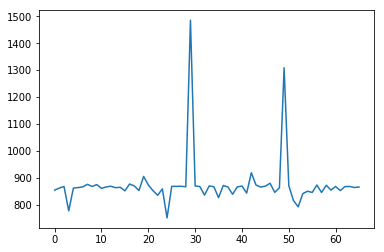

In [31]:
n=len(y)
x = X[:,11]
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)  
y_pred=lr.predict(x[:, np.newaxis])

s2=np.sum((y-y_pred)**2)/(n-1)


D=[]

for i in range(n):
  x_del_i=np.delete(x,i)
  y_del_i=np.delete(y,i) 
  
  lr.fit(x_del_i[:, np.newaxis], y_del_i)
  sum_squared_error=np.sum((y_pred-lr.predict(x[:, np.newaxis]))**2)

  D.append(sum_squared_error/(2.*s2))

plt.plot(D)

On remarque tout de suite que 2 observations n'ont pas du tout le même ordre de grandeur que les autres. Ce sont les outliers.

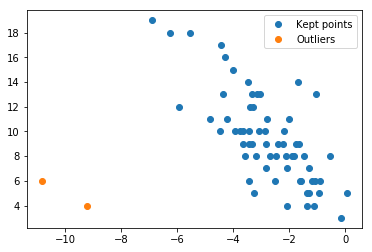

In [32]:
D = np.array(D)

mask = D < 1000
mask_remove = D > 1000

plt.plot(X[mask,11],Y[mask],marker = 'o',linestyle = "", label ="Kept points" )
plt.plot(X[mask_remove,11],Y[mask_remove],marker = 'o',linestyle = "", label ="Outliers" )
plt.legend()

## QUESTION 2.3.2  
Nous supprimerons dans la suite de cet exercice les deux observations qui sont aberrantes sur la variable 'Feature_12'. 

Comment auriez-vous traite ces observations si vous aviez absolument voulu preserver l'information qu'elles contiennent dans les autres variables ?

### Réponse 

On aurait pu modifier les valeurs de ces observations pour le feature 12 en les prenant égales à la moyenne du feature 12 pour qu'elles n'aient plus d'influence sur la régression linéaire du modèle 12.

# QUESTION 2.4 

Une fois les deux observations aberrantes de 'Feature_12' supprimees, on souhaite selectionner les variables de 'X' qui permettent de prédire au mieux 'Risk_level' a l'aide de la regression multiple regularisee.

## QUESTION 2.4.1 

Quelle strategie vous semble la plus appropriee pour selectionner les variables les plus pertinentes ? Quel pretraitement allez-vous de meme effectuer sur les donnees.

### Réponse

La stratégie la plus appropriée serait de sélectionner les variables les plus pertinentes avec une régularisation LASSO en choisissant $\alpha$ avec une méthode de valorisation croisée qui minimise l'erreur moyenne quadratique.

Avant cela, il faut supprimer les outliers du modèle pour ne pas qu'il perturbe le modèle. 

In [12]:
Xnew = X[mask,:].copy()
Ynew = Y[mask].copy()

## QUESTION 2.4.2 

Effectuez la procedure de selection des variables optimales en parametrant a la main le poids entre la qualite de prediction et le niveau de regularisation.

In [15]:
from sklearn.linear_model import Lasso

alpha = 1
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(Xnew, Ynew)

print(lasso_regressor.coef_)

selected_variables = np.nonzero(lasso_regressor.coef_)[0]

print("\nLes features sélectionnés sont donc les features :",*(selected_variables+1))

[ 0.03176736 -0.         -0.          0.         -0.         -0.
  0.         -0.02547665 -0.          0.         -0.         -0.18094197
  0.         -0.00416524  0.          0.06532849 -0.         -0.01915723]

Les features sélectionnés sont donc les features : 1 8 12 14 16 18


## QUESTION 2.4.3 

Effectuez la procedure automatique de parametrisation de ce poids, de sorte a ce q'un maximum de trois variables soit typiquement selectionne et que la qualite de prediction soit optimale.

Quelle methode de validation croisee vous semble la plus raisonnable ici ?

La selection des variables est-elle stable ?

### Réponse

La méthode qui semble la plus raisonnable est la méthode de validation croisée Leave One Out car c'est la plus robuste notamment pour n petit comme dans notre cas.

In [19]:
from sklearn.model_selection import LeaveOneOut,KFold

#-> 1ere passe : estimation de l'echelle du alpha optimal

loo = LeaveOneOut()
for alpha in [0.001,0.01,0.1,1.,10.]:
  sum_mse_scores=0.
  for train, test in loo.split(Xnew):
    X_train=Xnew[train]
    y_train=Ynew[train]
    X_test=Xnew[test]
    y_test=Ynew[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
  
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso
  print(alpha," total: ",sum_mse_scores)


0.001  total:  251.27676152557646
0.01  total:  232.80045744418936
0.1  total:  197.21900512161224
1.0  total:  254.50043241150502
10.0  total:  265.98283259396925


In [20]:
#-> 2eme passe : estimation plus fine du alpha optimal

loo = LeaveOneOut()
for alpha in [0.025,0.05,0.1,0.2,0.4,0.8]:
  sum_mse_scores=0.
  for train, test in loo.split(Xnew):
    X_train=Xnew[train]
    y_train=Ynew[train]
    X_test=Xnew[test]
    y_test=Ynew[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
  
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso
  print(alpha," total: ",sum_mse_scores)

0.025  total:  222.00270476139488
0.05  total:  209.41119921743586
0.1  total:  197.21900512161224
0.2  total:  210.06182811661782
0.4  total:  210.85743467083495
0.8  total:  235.72805725888801


In [21]:
#-> 3eme passe : estimation encore plus fine du alpha optimal

loo = LeaveOneOut()
for alpha in np.arange(0.05,0.15,0.01):
  sum_mse_scores=0.
  for train, test in loo.split(Xnew):
    X_train=Xnew[train]
    y_train=Ynew[train]
    X_test=Xnew[test]
    y_test=Ynew[test]
  
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
  
    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    sum_mse_scores+=mse_score_lasso
  print(alpha," total: ",sum_mse_scores)

0.05  total:  209.41119921743586
0.060000000000000005  total:  206.01927736578338
0.07  total:  202.91442570924778
0.08000000000000002  total:  199.9902919173202
0.09000000000000001  total:  197.83909387136262
0.1  total:  197.21900512161224
0.11000000000000001  total:  197.57512503259764
0.12000000000000001  total:  198.524525043024
0.13  total:  199.90877845384927
0.14  total:  201.39860785231429


Donc le meilleur score est obtenu pour alpha=0.1.

Regardons le nombre de variables sélectionnées au maximum.

In [22]:
alpha = 0.1
loo = LeaveOneOut()
nb = []
for train, test in loo.split(Xnew):
    X_train=Xnew[train]
    y_train=Ynew[train]
    X_test=Xnew[test]
    y_test=Ynew[test]

    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)
    
    nb.append(len(np.nonzero(lasso_regressor.coef_)[0]))
print(f'Maximum du nombre de variables sélectionnées : {max(nb)}')

Maximum du nombre de variables sélectionnées : 12


Le nombre de variable sélectionnées vaut au maximum 12 ce qui est supérieur à 3 pour le $\alpha$ optimal donc on continue à augmenter $\alpha$ jusqu'à ce qu'il n'y ait plus que 3 variables sélectionnées puisque la MSE ne va faire qu'augmenter.

In [23]:
loo = LeaveOneOut()
alpha=0.1
max_nb=12

print("Alpha  Max")
while max_nb>3:
    alpha += 0.1
    nb = []
    for train, test in loo.split(Xnew):
        X_train=Xnew[train]
        y_train=Ynew[train]
        X_test=Xnew[test]
        y_test=Ynew[test]

        lasso_regressor = Lasso(alpha=alpha)
        lasso_regressor.fit(X_train, y_train)

        nb.append(len(np.nonzero(lasso_regressor.coef_)[0]))
    max_nb = max(nb)
    print(alpha,max_nb)

Alpha  Max
0.2 11
0.30000000000000004 10
0.4 8
0.5 8
0.6 7
0.7 7
0.7999999999999999 7
0.8999999999999999 7
0.9999999999999999 7
1.0999999999999999 7
1.2 7
1.3 6
1.4000000000000001 5
1.5000000000000002 5
1.6000000000000003 5
1.7000000000000004 4
1.8000000000000005 4
1.9000000000000006 4
2.0000000000000004 4
2.1000000000000005 4
2.2000000000000006 4
2.3000000000000007 4
2.400000000000001 4
2.500000000000001 4
2.600000000000001 4
2.700000000000001 4
2.800000000000001 3


On trouve que 3 variables au maximum sont sélectionnées pour le $\alpha$ optimal égale à 2.8.

Voyons lesquelles sont elles.

In [24]:
loo = LeaveOneOut()
alpha = 2.8
variables = [0]*18

for train, test in loo.split(Xnew):
    X_train=Xnew[train]
    y_train=Ynew[train]
    X_test=Xnew[test]
    y_test=Ynew[test]

    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)

    selected_variables = np.nonzero(lasso_regressor.coef_)[0]
    for i in range(18):
        if i in selected_variables:
            variables[i] += 1

print(variables)

[0, 0, 0, 0, 0, 0, 0, 64, 0, 0, 0, 0, 0, 1, 0, 64, 0, 18]


Ainsi on remarque que les 3 features sélectionnés sont les features 8, 16 et 18. 

Le feature 16 a, en effet, comme montré précédemment, une forte relation linéaire avec Y mais ce n'est pas le cas des 2 autres. 

Peut-être aurait-il fallu supprimer d'autres outliers en prenant le risque de perdre encore plus de données alors qu'on a déjà pas beaucoup.

Pour finir, étudions la stabilité de la prédiction en regardant la MSE sur un 5-folds :

In [25]:
kf = KFold(n_splits=5)
mse_scores=[]
for train, test in kf.split(Xnew):
    X_train=Xnew[train]
    y_train=Ynew[train]
    X_test=Xnew[test]
    y_test=Ynew[test]

    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X_train, y_train)

    y_pred_lasso = lasso_regressor.predict(X_test)
    mse_score_lasso = mean_squared_error(y_test, y_pred_lasso)
    mse_scores.append(mse_score_lasso)


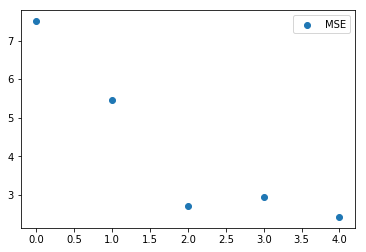

In [26]:
plt.scatter(range(5),mse_scores,label = 'MSE')
plt.legend()

On observe que la MSE admet un écart-type assez important sur les différents folds surtout que la MSE est beaucoup plus élevé seulement sur certain folds ce qui laisse aussi supposer la présence d'outliers non détectés.

Ainsi, la prédiction n'est pas très stable.